# Phase Plot Comparisons

In [1]:
%load_ext autoreload
%autoreload 2
import yt
import matplotlib.pyplot as plt
from utils import load_grackle_dataset, load_dengo_dataset
from plot_utils import plot_multi_sliceplot

/home/kwoksun2/anaconda3/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/kwoksun2/.config/yt/ytrc is deprecated in favor of /home/kwoksun2/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


 ChiantiPy version 0.12.0 
 found PyQt5 widgets
 using PyQt5 widgets


/home/kwoksun2/anaconda3/lib/python3.8/site-packages/ChiantiPy-0.12.0-py3.8.egg/ChiantiPy/tools/data.py:71: UserWarning: klgfb files are not present: 
  it will not be possible to use the freeBound continuum method
  warnings.warn('klgfb files are not present: \n  it will not be possible to use the freeBound continuum method')
/home/kwoksun2/anaconda3/lib/python3.8/site-packages/ChiantiPy-0.12.0-py3.8.egg/ChiantiPy/core/IpyMspectrum.py:9: UserWarning: ipyparallel not found. You won't be able to use the ipymspectrum module
  warnings.warn("ipyparallel not found. You won't be able to use the ipymspectrum module")


In [2]:
dengo_snap = "/home/kwoksun2/data/campus_cluster/bechem_z100_baryon_re3/DD0070/DD0070"
grackle_snap = "/home/kwoksun2/data/campus_cluster/grackle_z100_baryon/DD0072/DD0072"
dengo_ds = load_dengo_dataset(dengo_snap)
grackle_ds = load_grackle_dataset(grackle_snap)

yt : [INFO     ] 2022-09-12 21:28:44,669 Parameters: current_time              = 11.301308754354
yt : [INFO     ] 2022-09-12 21:28:44,670 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-09-12 21:28:44,671 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-09-12 21:28:44,672 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-09-12 21:28:44,673 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-09-12 21:28:44,674 Parameters: current_redshift          = 16.51946269887
yt : [INFO     ] 2022-09-12 21:28:44,674 Parameters: omega_lambda              = 0.724
yt : [INFO     ] 2022-09-12 21:28:44,675 Parameters: omega_matter              = 0.276
yt : [INFO     ] 2022-09-12 21:28:44,675 Parameters: omega_radiation           = 0
yt : [INFO     ] 2022-09-12 21:28:44,676 Parameters: hubble_constant           = 0.703
Parsing Hierarchy : 100%|██████████████████████████████████████████████████| 22287/22287 [00:03<00:00

In [5]:
def fraction_from_fully_molecular(field, data):
    return 0.76 - data["H2I_fraction"]


dengo_ds.add_field(
    ("gas", "H2_fraction_from_fully_molecular"),
    function=fraction_from_fully_molecular,
    sampling_type="cell",
    units="dimensionless",
    force_override=True,
)

grackle_ds.add_field(
    ("gas", "H2_fraction_from_fully_molecular"),
    function=fraction_from_fully_molecular,
    sampling_type="cell",
    units="dimensionless",
    force_override=True,
)

In [6]:
sp_dengo = dengo_ds.sphere("m", (1000, "AU"))
sp_grackle = grackle_ds.sphere("m", (1000, "AU"))

yt : [INFO     ] 2022-09-12 21:31:31,177 max value is 1.42583e-10 at 0.4980584005315905 0.5005448366355267 0.4986057875721599
yt : [INFO     ] 2022-09-12 21:31:46,739 max value is 1.89069e-10 at 0.4980918404980912 0.5005802176092402 0.4986024849858950


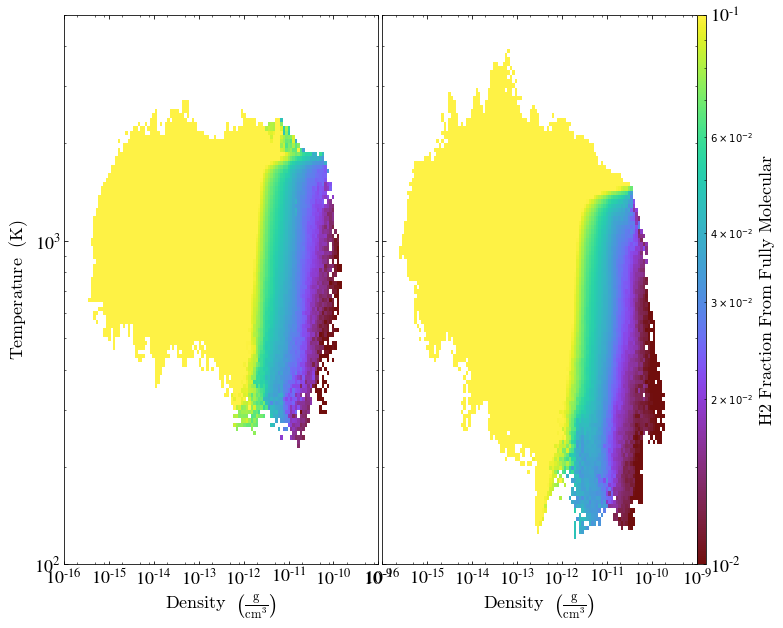

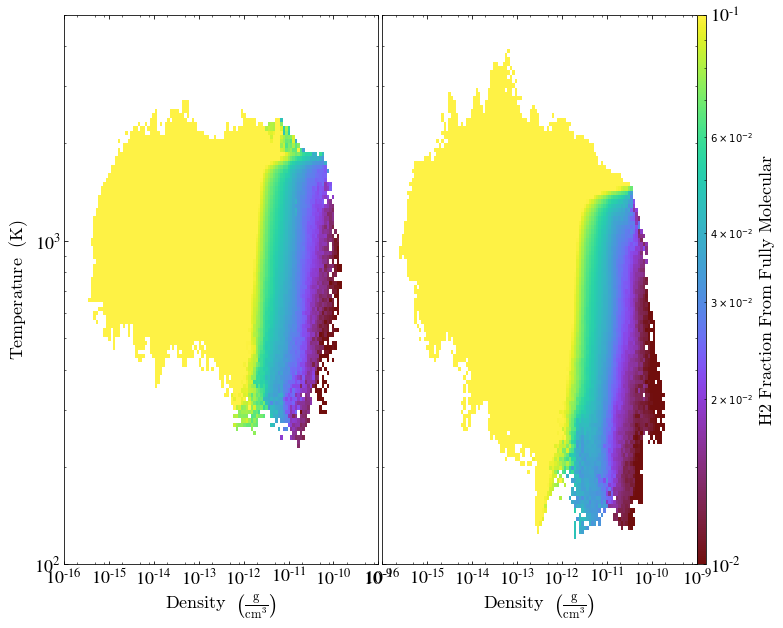

In [10]:
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt
import yt

fig = plt.figure()

# See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
grid = AxesGrid(
    fig,
    (0.085, 0.085, 0.83, 0.83),
    nrows_ncols=(1, 2),
    axes_pad=0.05,
    label_mode="L",
    share_all=True,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="3%",
    cbar_pad="0%",
    aspect=False,
)
i = 0
for ds in [sp_dengo, sp_grackle]:
    p = yt.PhasePlot(
        ds,
        ("gas", "density"),
        ("gas", "temperature"),
        [
            ("gas", "H2_fraction_from_fully_molecular"),
        ],
        weight_field=("gas", "density"),
    )

    p.set_xlim(1e-16, 1e-9)
    p.set_ylim(1e2, 5e3)
    p.set_zlim(("gas", "H2_fraction_from_fully_molecular"), 1e-2, 1e-1)

    # This forces the ProjectionPlot to redraw itself on the AxesGrid axes.
    plot = p.plots[("gas", "H2_fraction_from_fully_molecular")]
    plot.figure = fig
    plot.axes = grid[i].axes
    if i == 0:
        plot.cax = grid.cbar_axes[i]

    # Actually redraws the plot.
    p._setup_plots()

    # Modify the axes properties **after** p._setup_plots() so that they
    # are not overwritten.
    plot.axes.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=[2.0, 5.0, 8.0]))

    i += 1

fig

In [8]:
def evaluate_tdyn_tcool_ratio(field, data):
    return data["dynamical_time"] / data["cooling_time"]


dengo_ds.add_field(
    ("gas", "tdyn_tcool_ratio"),
    function=evaluate_tdyn_tcool_ratio,
    sampling_type="cell",
    units="dimensionless",
    force_override=True,
)

grackle_ds.add_field(
    ("gas", "tdyn_tcool_ratio"),
    function=evaluate_tdyn_tcool_ratio,
    sampling_type="cell",
    units="dimensionless",
    force_override=True,
)

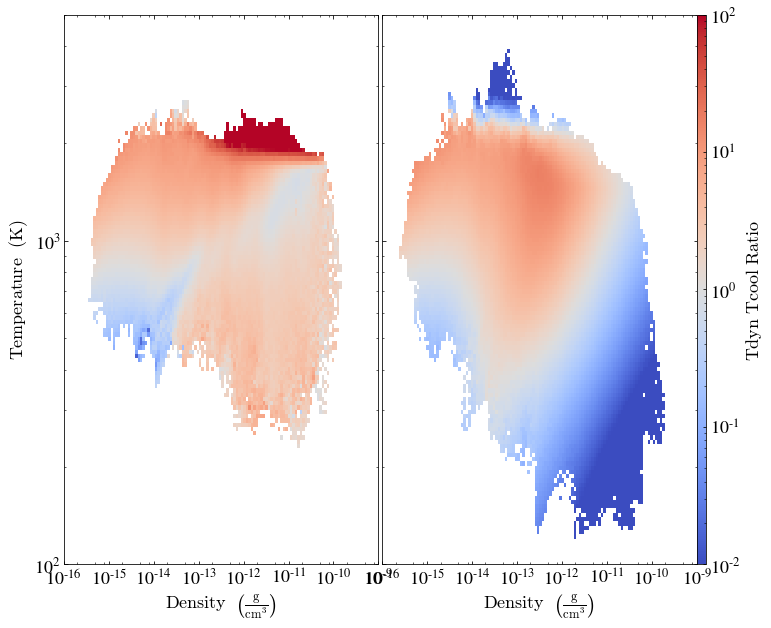

In [9]:
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt
import yt

fig = plt.figure()

# See http://matplotlib.org/mpl_toolkits/axes_grid/api/axes_grid_api.html
grid = AxesGrid(
    fig,
    (0.085, 0.085, 0.83, 0.83),
    nrows_ncols=(1, 2),
    axes_pad=0.05,
    label_mode="L",
    share_all=True,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="3%",
    cbar_pad="0%",
    aspect=False,
)
i = 0
for ds in [sp_dengo, sp_grackle]:
    p = yt.PhasePlot(
        ds,
        ("gas", "density"),
        ("gas", "temperature"),
        [
            ("gas", "tdyn_tcool_ratio"),
        ],
        weight_field=("gas", "density"),
    )

    p.set_xlim(1e-16, 1e-9)
    p.set_ylim(1e2, 5e3)
    p.set_zlim("tdyn_tcool_ratio", 1e-2, 1e2)
    p.set_cmap("tdyn_tcool_ratio", "coolwarm")

    # This forces the ProjectionPlot to redraw itself on the AxesGrid axes.
    plot = p.plots[("gas", "tdyn_tcool_ratio")]
    plot.figure = fig
    plot.axes = grid[i].axes
    if i == 0:
        plot.cax = grid.cbar_axes[i]

    # Actually redraws the plot.
    p._setup_plots()

    # Modify the axes properties **after** p._setup_plots() so that they
    # are not overwritten.
    plot.axes.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=[2.0, 5.0, 8.0]))

    i += 1